In [75]:
!pip install labelme tensorflow opencv-python matplotlib albumentations

In [2]:
import os
import time
import uuid
import cv2
import json
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [19]:
IMAGES_PATH = os.path.join('data','images')
number_images = 30


In [22]:
cap = cv2.VideoCapture(0)
for imgnum in range(30):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [1]:
!labelme

2024-01-28 18:52:03,863 [INFO   ] __init__:get_config:67- Loading config file from: /Users/athekk875/.labelmerc
2024-01-28 18:52:08.043 python[7457:72850] +[CATransaction synchronize] called within transaction
2024-01-28 18:52:47.696 python[7457:72850] +[CATransaction synchronize] called within transaction
2024-01-28 18:53:20.380 python[7457:72850] +[CATransaction synchronize] called within transaction
2024-01-28 18:53:29.363 python[7457:72850] +[CATransaction synchronize] called within transaction
^C


In [3]:
import tensorflow as tf
import os

In [4]:
pip install tensorflow


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

In [6]:
tf.config.list_physical_devices('GPU')

[]

In [7]:
images = tf.data.Dataset.list_files('data/images/*.jpg')


In [8]:
images.as_numpy_iterator().next()

b'data/images/f15f601a-bddb-11ee-a68e-225939cd7d7a.jpg'

In [30]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img


In [10]:
images = images.map(load_image)

In [11]:
images.as_numpy_iterator().next()


array([[[195, 209, 196],
        [197, 211, 198],
        [200, 213, 203],
        ...,
        [202, 159, 152],
        [190, 145, 139],
        [179, 134, 128]],

       [[200, 214, 201],
        [201, 215, 202],
        [202, 215, 205],
        ...,
        [202, 159, 152],
        [193, 148, 142],
        [184, 139, 133]],

       [[204, 218, 205],
        [203, 217, 204],
        [203, 216, 206],
        ...,
        [207, 164, 157],
        [202, 159, 152],
        [196, 153, 146]],

       ...,

       [[185, 191, 189],
        [186, 192, 190],
        [186, 192, 190],
        ...,
        [219, 181, 180],
        [215, 176, 177],
        [214, 175, 176]],

       [[178, 184, 182],
        [182, 188, 186],
        [186, 192, 190],
        ...,
        [215, 180, 178],
        [213, 174, 175],
        [212, 173, 174]],

       [[171, 177, 175],
        [178, 184, 182],
        [185, 191, 189],
        ...,
        [216, 181, 179],
        [217, 178, 179],
        [217, 178, 179]]

In [12]:
type(images)


tensorflow.python.data.ops.map_op._MapDataset

In [13]:
image_generator = images.batch(4).as_numpy_iterator()

In [16]:
plot_images = image_generator.next()

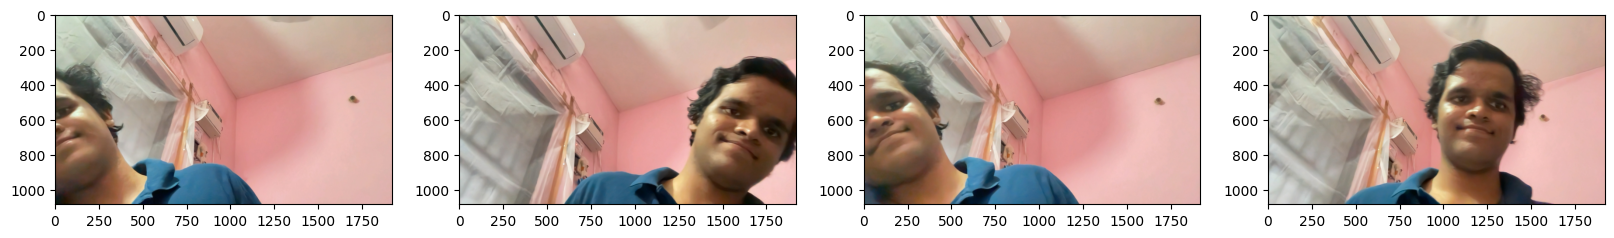

In [17]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

In [4]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)

In [5]:
pip install albumentations



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
import albumentations as alb

In [7]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

In [8]:
img = cv2.imread(os.path.join('data','train', 'images','c9d9ad4e-bddf-11ee-97ca-225939cd7d7a.jpg'))

In [9]:
img.shape

(1080, 1920, 3)

In [12]:
with open(os.path.join('data', 'train', 'labels', 'c9d9ad4e-bddf-11ee-97ca-225939cd7d7a.json'), 'r') as f:
    label = json.load(f)

In [13]:
label['shapes'][0]['points']

[[956.7105263157896, 283.42105263157896],
 [1431.7105263157894, 920.2631578947368]]

In [14]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [15]:
coords

[956.7105263157896, 283.42105263157896, 1431.7105263157894, 920.2631578947368]

In [18]:
coords = list(np.divide(coords, [1920,1080,1920,1080]))

In [19]:
coords

[0.4982867324561404,
 0.26242690058479534,
 0.7456825657894737,
 0.8520955165692007]

In [20]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [21]:
augmented['bboxes']

[(0.0, 0.13871345029239768, 0.11619883040935641, 1.0)]

In [22]:
augmented['bboxes'][0][2:]

(0.11619883040935641, 1.0)

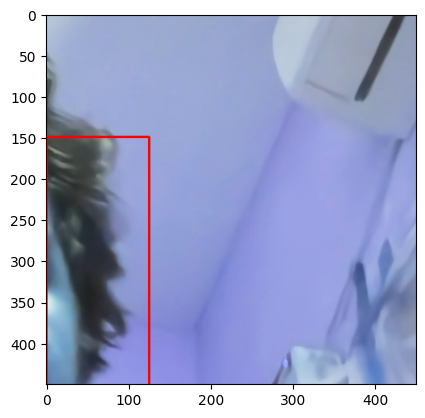

In [25]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [1080,1080]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [1080,1080]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

In [26]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [1920,1080,1920,1080]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

image must be numpy array type
x_max is less than or equal to x_min for bbox [0.23649945175438597, 0.9446881091617934, 2.960594732333751e-17, 0.2632797270955165, 'face'].
x_max is less than or equal to x_min for bbox [0.22005208333333334, 0.9044834307992202, 0.0, 0.2654363868608721, 'face'].
image must be numpy array type
x_max is less than or equal to x_min for bbox [0.26391173245614036, 0.8959551656920077, 2.960594732333751e-17, 0.26358695652173925, 'face'].
image must be numpy array type


In [31]:
train_images = tf.data.Dataset.list_files('aug_data/train/images/*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [32]:
train_images.as_numpy_iterator().next()

array([[[0.8730392 , 0.7519608 , 0.69166666],
        [0.86881125, 0.75508577, 0.68449754],
        [0.8627451 , 0.75686276, 0.67941177],
        ...,
        [0.4872549 , 0.38039216, 0.33186275],
        [0.49479166, 0.3841299 , 0.32107842],
        [0.5047794 , 0.3939951 , 0.32487744]],

       [[0.87193626, 0.7504902 , 0.6872549 ],
        [0.8661765 , 0.7525123 , 0.6817402 ],
        [0.8623162 , 0.75643384, 0.6740809 ],
        ...,
        [0.4730392 , 0.37254903, 0.32107842],
        [0.48131126, 0.3735294 , 0.31764707],
        [0.48854166, 0.38284314, 0.31654412]],

       [[0.8745098 , 0.7504902 , 0.6872549 ],
        [0.87009805, 0.7495098 , 0.6789216 ],
        [0.8627451 , 0.7529412 , 0.67058825],
        ...,
        [0.45147058, 0.36519608, 0.31029412],
        [0.46666667, 0.3764706 , 0.31470588],
        [0.47745097, 0.37990198, 0.3189951 ]],

       ...,

       [[0.93235296, 0.76715684, 0.7529412 ],
        [0.9372549 , 0.7647059 , 0.7529412 ],
        [0.9411765 , 0

In [33]:
test_images = tf.data.Dataset.list_files('aug_data/test/images/*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [34]:
val_images = tf.data.Dataset.list_files('aug_data/val/images/*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [35]:
train_images.as_numpy_iterator().next()

array([[[0.8730392 , 0.7519608 , 0.69166666],
        [0.86881125, 0.75508577, 0.68449754],
        [0.8627451 , 0.75686276, 0.67941177],
        ...,
        [0.4872549 , 0.38039216, 0.33186275],
        [0.49479166, 0.3841299 , 0.32107842],
        [0.5047794 , 0.3939951 , 0.32487744]],

       [[0.87193626, 0.7504902 , 0.6872549 ],
        [0.8661765 , 0.7525123 , 0.6817402 ],
        [0.8623162 , 0.75643384, 0.6740809 ],
        ...,
        [0.4730392 , 0.37254903, 0.32107842],
        [0.48131126, 0.3735294 , 0.31764707],
        [0.48854166, 0.38284314, 0.31654412]],

       [[0.8745098 , 0.7504902 , 0.6872549 ],
        [0.87009805, 0.7495098 , 0.6789216 ],
        [0.8627451 , 0.7529412 , 0.67058825],
        ...,
        [0.45147058, 0.36519608, 0.31029412],
        [0.46666667, 0.3764706 , 0.31470588],
        [0.47745097, 0.37990198, 0.3189951 ]],

       ...,

       [[0.93235296, 0.76715684, 0.7529412 ],
        [0.9372549 , 0.7647059 , 0.7529412 ],
        [0.9411765 , 0

In [36]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

In [37]:
train_labels = tf.data.Dataset.list_files('aug_data/train/labels/*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [38]:
test_labels = tf.data.Dataset.list_files('aug_data/test/labels/*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [39]:
val_labels = tf.data.Dataset.list_files('aug_data/val/labels/*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [40]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8), array([0.595, 0.   , 1.   , 1.   ], dtype=float16))

In [41]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(3660, 3660, 780, 780, 780, 780)

In [42]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [43]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [44]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [45]:
data_samples = train.as_numpy_iterator()

In [46]:
res = data_samples.next()

error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'rectangle'
> Overload resolution failed:
>  - img marked as output argument, but provided NumPy array marked as readonly
>  - Expected Ptr<cv::UMat> for argument 'img'
>  - img marked as output argument, but provided NumPy array marked as readonly
>  - Expected Ptr<cv::UMat> for argument 'img'


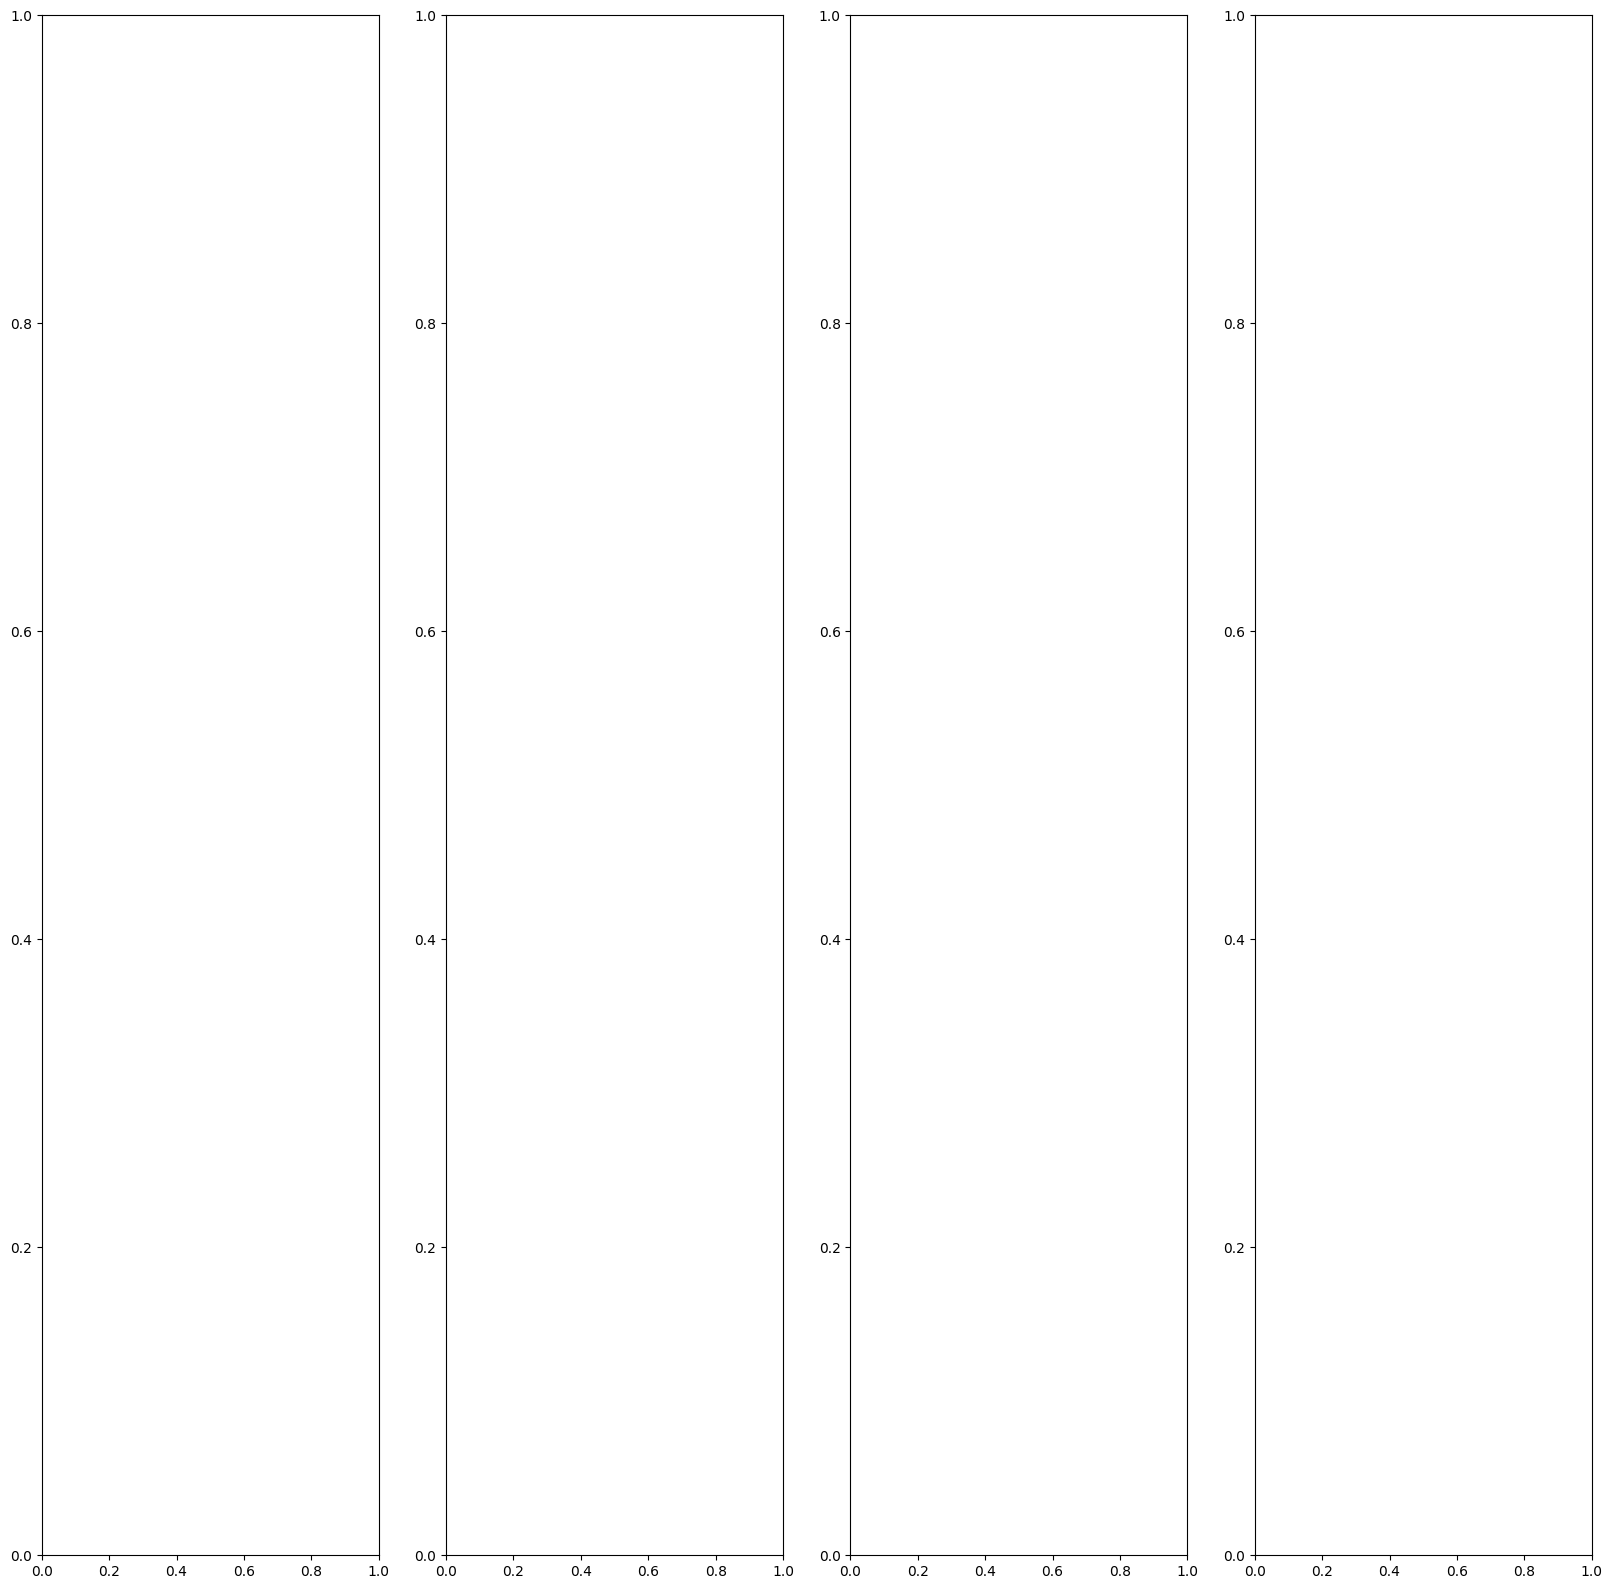

In [47]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)
    
    

In [48]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [49]:
vgg = VGG16(include_top=False)

In [50]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [51]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [52]:
facetracker = build_model()

In [53]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 120, 120, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, None, None, 512)      1471468   ['input_2[0][0]']             
                                                          8                                       
                                                                                                  
 global_max_pooling2d (Glob  (None, 512)                  0         ['vgg16[0][0]']               
 alMaxPooling2D)                                                                                  
                                                                                              

In [54]:
X, y = train.as_numpy_iterator().next()

In [55]:
X.shape

(8, 120, 120, 3)

In [56]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 0s 234ms/step


In [57]:
classes, coords

(array([[0.46132365],
        [0.42865983],
        [0.4258468 ],
        [0.42459002],
        [0.45636714],
        [0.46260214],
        [0.42073214],
        [0.36805117]], dtype=float32),
 array([[0.5584076 , 0.49614036, 0.43787   , 0.31070003],
        [0.6082166 , 0.42622134, 0.5003469 , 0.32332733],
        [0.5722258 , 0.5205572 , 0.46511889, 0.2787684 ],
        [0.5599869 , 0.4334854 , 0.41477638, 0.33963966],
        [0.5524196 , 0.4940232 , 0.45074195, 0.35911202],
        [0.6286926 , 0.5097211 , 0.5742636 , 0.30355474],
        [0.55922645, 0.54316896, 0.46540025, 0.36426145],
        [0.58950096, 0.54523665, 0.4845179 , 0.31794804]], dtype=float32))

In [58]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [59]:
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, decay=lr_decay)

In [60]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [61]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [62]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=11.824897>

In [63]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.7288023>

In [64]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=11.824897>

In [65]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [66]:
model = FaceTracker(facetracker)

In [67]:
model.compile(opt, classloss, regressloss)

In [68]:
logdir='logs'


In [69]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [70]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
458/458 [==============================] - 254s 549ms/step - total_loss: 1.0274 - class_loss: 0.2045 - regress_loss: 0.9251 - val_total_loss: 0.1587 - val_class_loss: 0.0510 - val_regress_loss: 0.1332
Epoch 2/10
458/458 [==============================] - 251s 545ms/step - total_loss: 0.5099 - class_loss: 0.1193 - regress_loss: 0.4503 - val_total_loss: 0.1305 - val_class_loss: 0.0082 - val_regress_loss: 0.1263
Epoch 3/10
458/458 [==============================] - 251s 544ms/step - total_loss: 0.3710 - class_loss: 0.0943 - regress_loss: 0.3239 - val_total_loss: 0.0277 - val_class_loss: 0.0116 - val_regress_loss: 0.0219
Epoch 4/10
458/458 [==============================] - 255s 550ms/step - total_loss: 0.3061 - class_loss: 0.0822 - regress_loss: 0.2650 - val_total_loss: 0.0286 - val_class_loss: 0.0148 - val_regress_loss: 0.0212
Epoch 5/10
458/458 [==============================] - 269s 582ms/step - total_loss: 0.2220 - class_loss: 0.0594 - regress_loss: 0.1923 - val_total_loss:

In [71]:
hist.history

{'total_loss': [0.24861353635787964,
  0.1132519543170929,
  0.024027902632951736,
  0.02691236138343811,
  0.038217149674892426,
  0.0651024580001831,
  0.103668212890625,
  0.006312655750662088,
  0.010216860100626945,
  0.00503766443580389],
 'class_loss': [0.16086041927337646,
  0.006885418202728033,
  0.002613798016682267,
  0.014523586258292198,
  0.00023820833303034306,
  0.04862615093588829,
  0.030782781541347504,
  0.0023273092228919268,
  0.0011288471287116408,
  0.0008483976125717163],
 'regress_loss': [0.1681833267211914,
  0.10980924218893051,
  0.022721003741025925,
  0.019650567322969437,
  0.03809804469347,
  0.04078938066959381,
  0.08827681839466095,
  0.005149001255631447,
  0.009652436710894108,
  0.004613465629518032],
 'val_total_loss': [0.15874385833740234,
  0.13045960664749146,
  0.02774032950401306,
  0.02862551063299179,
  0.06959909945726395,
  1.4498894214630127,
  0.6762632131576538,
  0.0206342414021492,
  0.006686732172966003,
  0.027627289295196533],
 

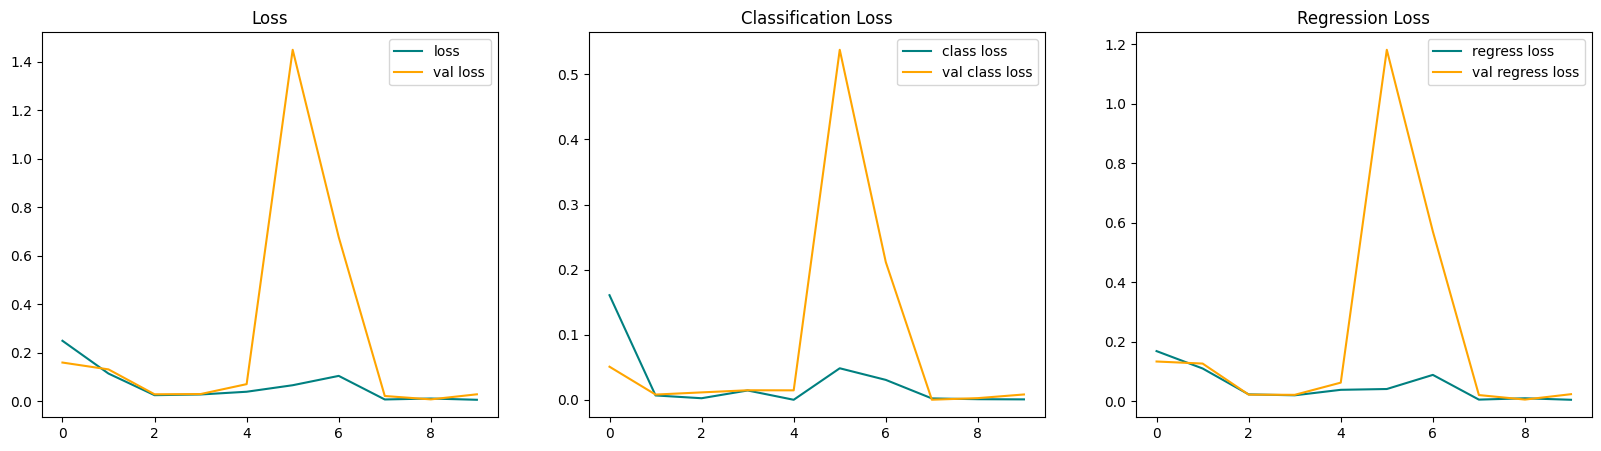

In [72]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

In [73]:
test_data = test.as_numpy_iterator()

In [74]:
test_sample = test_data.next()

In [75]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 0s 162ms/step


error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'rectangle'
> Overload resolution failed:
>  - img marked as output argument, but provided NumPy array marked as readonly
>  - Expected Ptr<cv::UMat> for argument 'img'
>  - img marked as output argument, but provided NumPy array marked as readonly
>  - Expected Ptr<cv::UMat> for argument 'img'


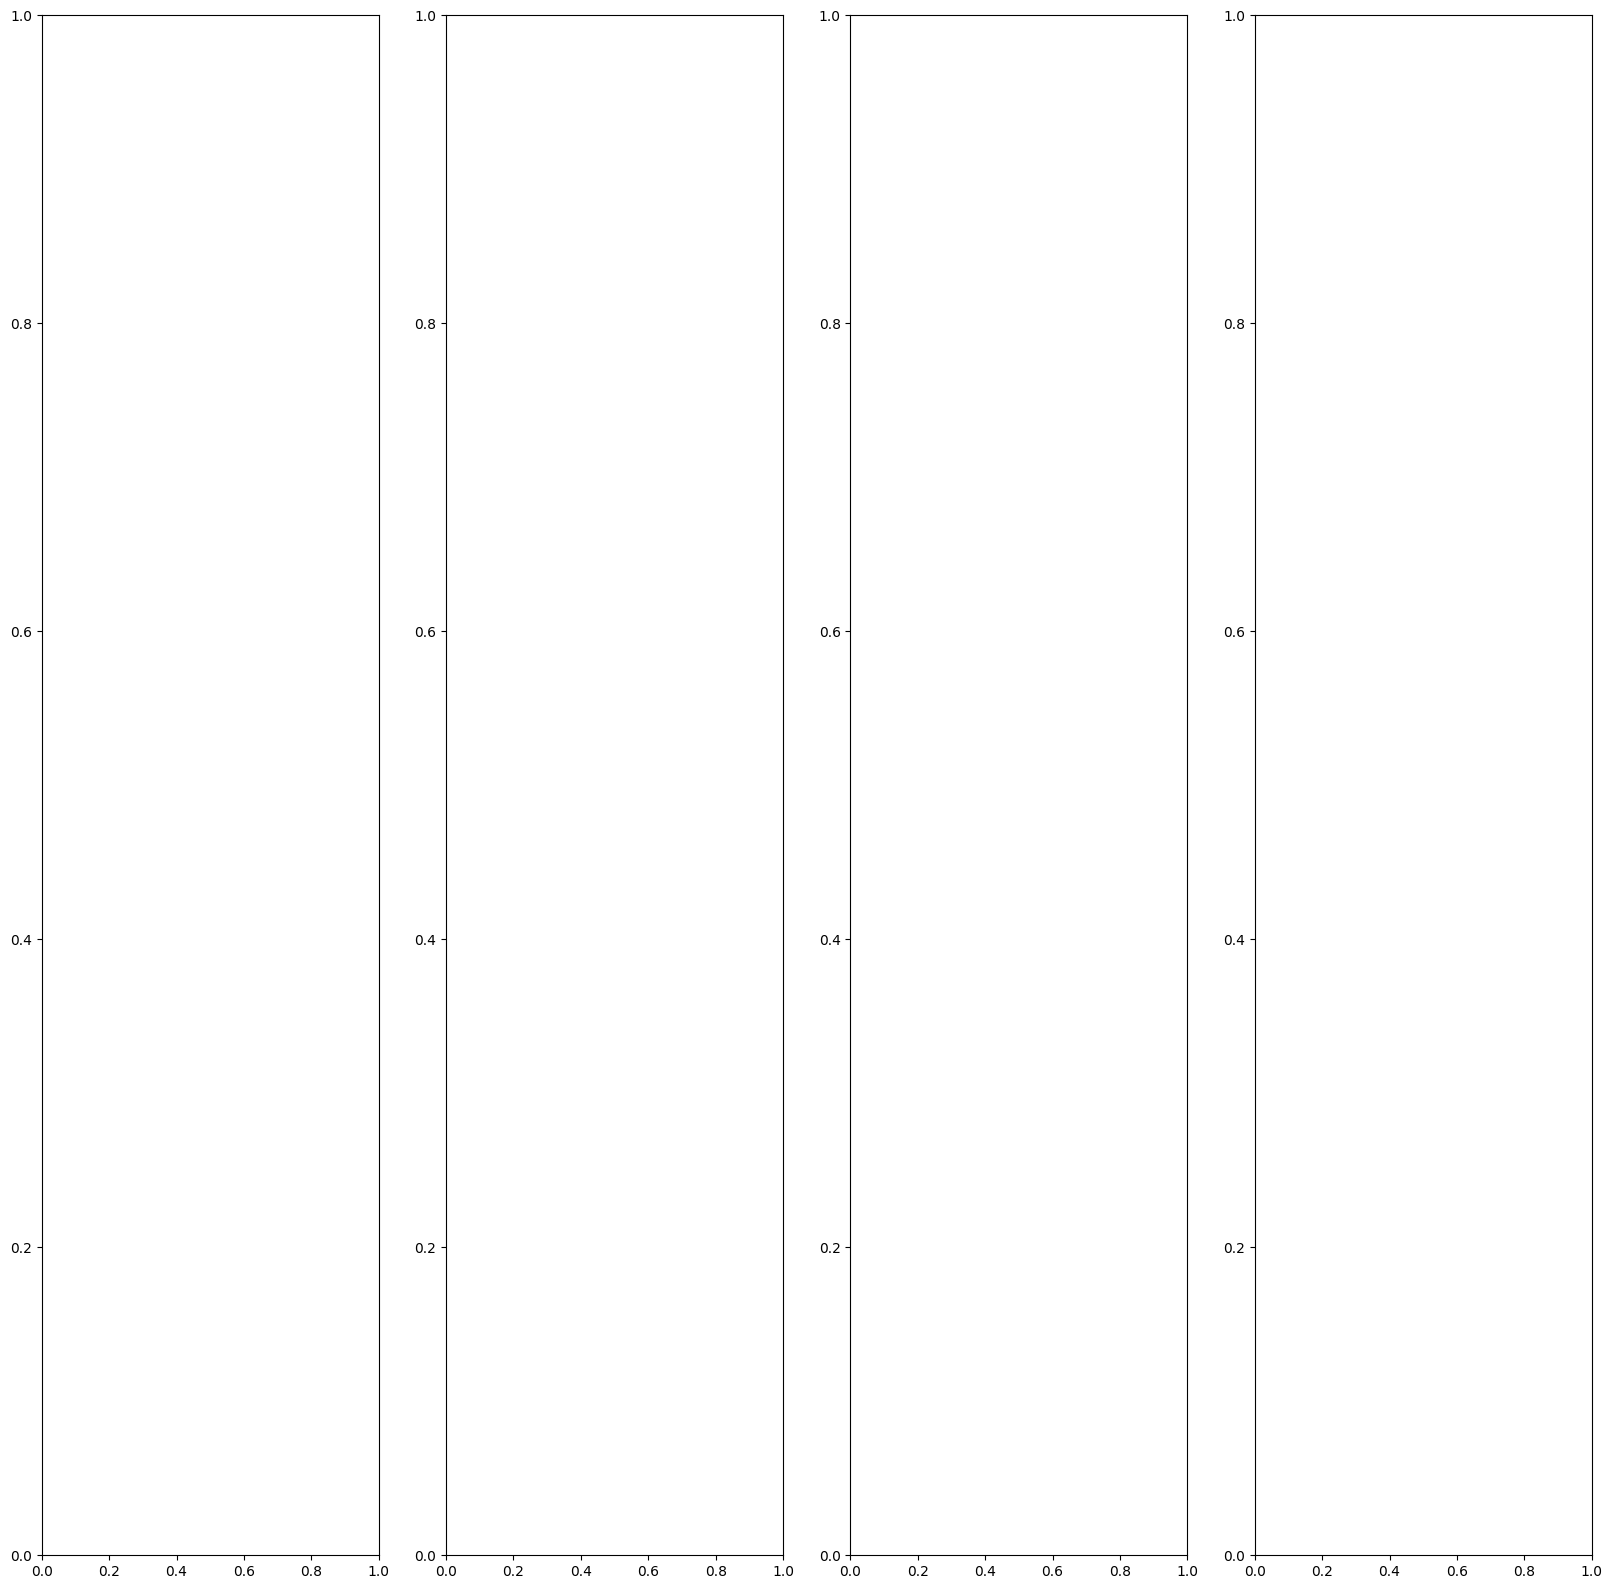

In [76]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
 
sample_image = test_sample[0][0]
sample_coords = yhat[1][0]
    
if yhat[0][idx] > 0.9:
    cv2.rectangle(sample_image, (sample_coords[:2]),(sample_coords[2:]), (255,0,0), 2)
    
    plt.imshow(sample_image)

In [73]:
cv2.rectangle(sample_image, 
                      (sample_coords[:2]),
                      (sample_coords[2:]), 
                            (255,0,0), 2)

error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'rectangle'
> Overload resolution failed:
>  - img marked as output argument, but provided NumPy array marked as readonly
>  - Expected Ptr<cv::UMat> for argument 'img'
>  - img marked as output argument, but provided NumPy array marked as readonly
>  - Expected Ptr<cv::UMat> for argument 'img'


In [5]:
from tensorflow.keras.models import load_model

In [78]:
facetracker.save('facetracker1.h5')

/Users/athekk875/Desktop/ImageClassification/imgclsfctn/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [6]:
facetracker = load_model('facetracker.h5')

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 35ms/step
